# MAV - Practice 2 -> PAIS


## Task

Необходимо дополнить следующий фрагмент кода моделью ИНС, которая способна провести бинарную классификацию по сгенерированным данным:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 


### `Личный вариант:`

In [12]:
def genData(size:int=100):
    data = np.random.rand(size, 2)*2 - 1
    label = np.zeros([size, 1])

    for i, p in enumerate(data):
        if (p[0]+0.2)**2 + (0.6*p[1])**2 >= 0.25:
            label[i] = 0.
        else:
            label[i] = 1.

    div = round(size*0.8)
    
    train_data = data[:div, :]
    test_data = data[div:, :]
    train_label = label[:div, :]
    test_label = label[div:, :]

    return (train_data, train_label), (test_data, test_label)

In [13]:
def drawResults(data, label, prediction):
    p_label = np.array([round(x[0]) for x in prediction])
    plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
    plt.grid()
    plt.show()


Для создания модели используем простую архитектуру сети состоящую из входного, скрытого и выходного полного слоя 

- По интуиции бинарной классификации выбрал архитектуру нейронной сети 60 -> 40 -> 1
- Хватает `100` эпох.
- Оптимизатор, метрику, и функцию потерь используем не самые сложные. ---> 

P.s. бинарная классификация -> `loss='binary_crossentropy'` -> Слой активации на выходе -> `activation='sigmoid'`

In [14]:
(train_data, train_label), (test_data, test_label) = genData()

model = Sequential()
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(train_data, train_label, epochs=100, batch_size=10, validation_split=0.1)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6043 - loss: 0.6760 - val_accuracy: 0.6250 - val_loss: 0.6537
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.6387 - val_accuracy: 0.6250 - val_loss: 0.6321
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.5945 - val_accuracy: 0.6250 - val_loss: 0.6146
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6454 - loss: 0.6013 - val_accuracy: 0.6250 - val_loss: 0.5984
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6715 - loss: 0.5764 - val_accuracy: 0.6250 - val_loss: 0.5852
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5479 - val_accuracy: 0.6250 - val_loss: 0.5700
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 0.5587 - val_accuracy: 0.6250 - val_loss: 0.5554
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6266 - loss: 0.5625 - val_accuracy: 0.6250 - val_loss: 0.5411

In [15]:
loss = H.history['loss']
val_loss = H.history['val_loss']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(1, len(loss) + 1)


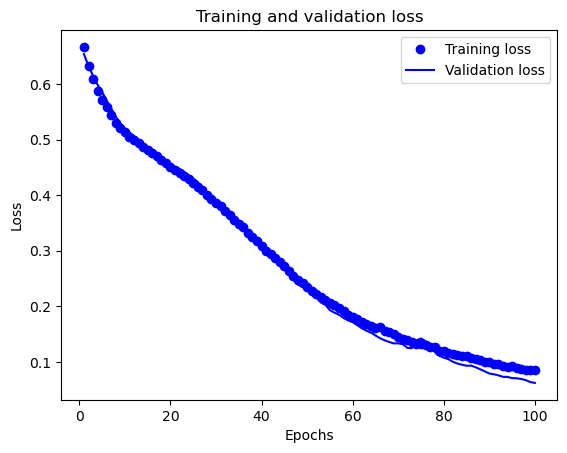

In [16]:
#Построение графика ошибки
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

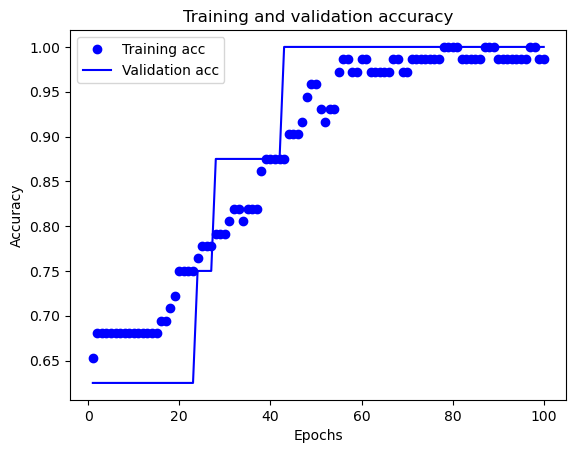

In [17]:
#Построение графика точности
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
#Получение и вывод результатов на тестовом наборе
results = model.evaluate(test_data, test_label)
print(results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9000 - loss: 0.2149
[0.21489317715168, 0.8999999761581421]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


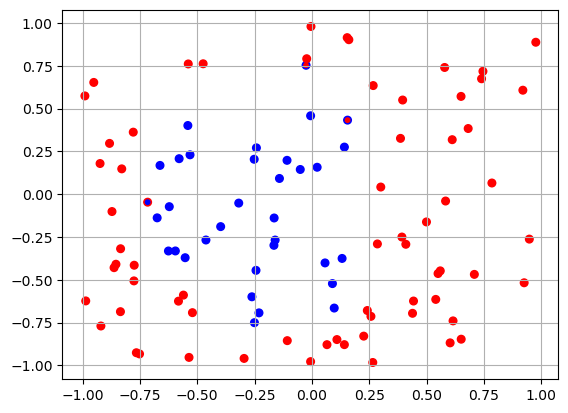

In [19]:
#Вывод результатов бинарной классификации
all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))
pred = model.predict(all_data)
drawResults(all_data, all_label, pred)

## Conclusion
По графикам видно что хватает простенькой модельки, для решения данной проблемы с небольшим количеством нейронов. 

К оценке моделей добавлю матрицу ошибок на которой хорошо видно удачное разбиение предикторов -> `TN` + `TP`

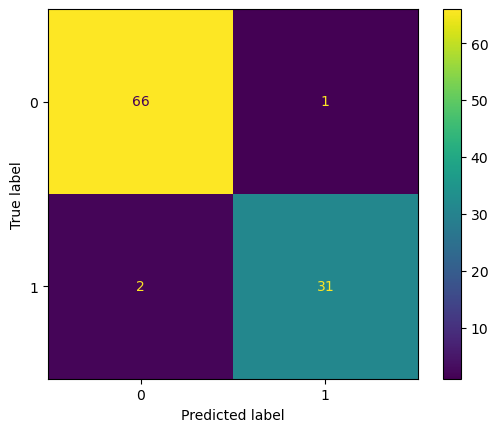

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf

predicted = tf.squeeze(pred)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(all_label)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()